In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
file = "C:\\Users\\simon\\OneDrive\\Escritorio\\Coding_dojp\\Datos\\flight_df - flight_df.csv"

df = pd.read_csv(file)

## Problema
Una empresa de aerolínea le gustaría saber más sobre sus clientes y cómo satisfacerlos.  Han proporcionado cierta información sobre 20 000 clientes, así como los resultados de una entrevista de satisfacción.  Los datos están disponibles aquí.

### Ellos quieren que hagas:

1. Una segmentación de los clientes en grupos y describir esos grupos, qué tienen en común y en qué se diferencian.

2. Un modelado de datos para ver si la satisfacción general de los clientes se puede predecir por la información de sus vuelos y las respuestas a la entrevista, además de la satisfacción general.

In [2]:
df.head(10)

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0
5,79,3,2727,5,1,1,1,4,4,4,...,5,2,5,3,0,0,0,1,1,0
6,41,1,1192,2,4,2,3,3,2,3,...,3,4,4,3,2,0,0,1,0,0
7,24,3,1506,0,0,0,4,4,0,4,...,5,3,4,4,0,0,0,0,1,1
8,49,1,680,5,5,5,5,5,5,5,...,1,2,3,5,0,0,1,1,1,1
9,40,1,488,2,4,2,2,4,2,2,...,4,4,5,4,1,0,0,1,0,0


In [3]:
df.shape

(20000, 23)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Age                                  0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Male                          0
Loyal Customer                       0
Business Travel                      0
satisfied                            0
dtype: int64

In [6]:
#Labels per column

print("Number of labels per column")
print("==="*16)
for x in df.columns:
    print(f"{x} : {len(df[x].unique())} labels")
    print(f"{x} : {df[x].unique()} \n")

with open('output.txt', 'w') as f:
    print(df, file=f)

Number of labels per column
Age : 75 labels
Age : [26 52 28 54 40 79 41 24 49 59 21 57 25 22 29 48  9 30 42 17 32 44 27 43
 46 37 53 23 12 33 10  7 15 65 20 34 31 39 56  8 60 36 69 58 62 51 47 16
 63 38 72 70 64 18 71 35 45 68 55 11 67 14 19 50 66 61 13 77 80 85 73 75
 74 78 76] 

Class : 3 labels
Class : [3 1 2] 

Flight Distance : 3108 labels
Flight Distance : [2062  680  188 ... 3504 2875 1515] 

Inflight wifi service : 6 labels
Inflight wifi service : [2 5 3 4 0 1] 

Departure/Arrival time convenient : 6 labels
Departure/Arrival time convenient : [3 5 1 4 0 2] 

Ease of Online booking : 6 labels
Ease of Online booking : [3 5 1 2 0 4] 

Gate location : 6 labels
Gate location : [3 5 4 1 2 0] 

Food and drink : 6 labels
Food and drink : [2 3 4 5 1 0] 

Online boarding : 6 labels
Online boarding : [2 4 3 0 5 1] 

Seat comfort : 5 labels
Seat comfort : [2 4 3 5 1] 

Inflight entertainment : 6 labels
Inflight entertainment : [2 4 3 5 1 0] 

On-board service : 6 labels
On-board service : 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

In [8]:
print(df["satisfied"].value_counts())
print(df["satisfied"].value_counts(normalize= True))

0    11339
1     8661
Name: satisfied, dtype: int64
0    0.56695
1    0.43305
Name: satisfied, dtype: float64


In [9]:
#Escalar los datos para evitar sesgo de datos

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)#fit y transfor 

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

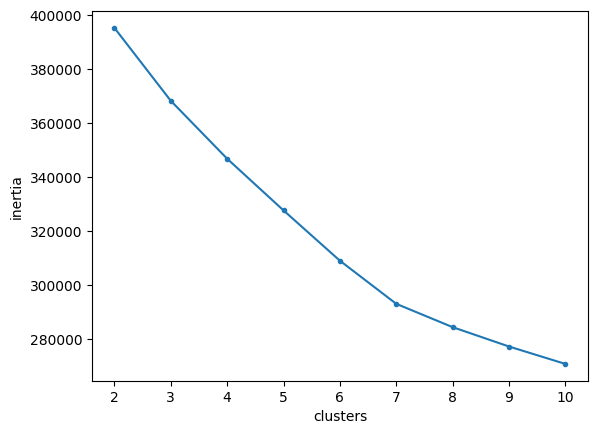

In [10]:
#Crear una lista para inercia
inertias = []
#loop atravez de los valores k entre 2 y 10, luego los guarda en la lista inertia.
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters');
plt.ylabel('inertia');

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

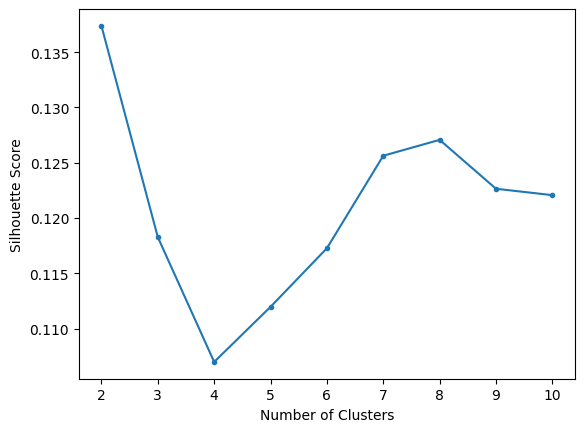

In [11]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [12]:
#encajar el modelo con 2 cluster 
kmeans = KMeans(n_clusters = 2, random_state= 42)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

# Agregamos los cluster al df
df['cluster'] = kmeans.labels_
df.head(110)

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,2,0,0,0,1,1,0,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,18,2,0,1,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,5,3,0,0,1,1,0,0,0
3,54,3,453,3,5,5,5,3,4,4,...,4,3,1,91,80,0,1,1,0,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,4,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,51,3,1743,3,3,3,3,3,4,4,...,4,4,5,0,0,0,1,1,1,1
106,40,3,448,1,1,1,1,4,2,5,...,1,4,4,0,9,0,1,1,1,1
107,22,1,992,1,0,0,1,4,0,4,...,3,4,4,21,18,1,0,1,0,0
108,54,2,628,5,1,1,1,5,3,1,...,2,5,2,2,0,0,1,1,1,1


In [13]:
# Agrupamos el df por cluster y por sus promedios
# agregamos el as_index = False para que el cluster sea una columna
cluster_groups = df.groupby('cluster', as_index=False).mean().round(1)
cluster_groups

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,37.2,1.6,908.8,2.3,3.0,2.5,2.9,2.7,2.6,...,3.2,3.0,3.2,2.7,15.8,16.4,0.5,0.8,0.5,0.1
1,1,42.2,2.5,1523.5,3.2,3.1,3.1,3.0,3.8,4.1,...,4.1,3.7,4.1,4.0,12.6,12.7,0.5,0.9,0.9,0.8


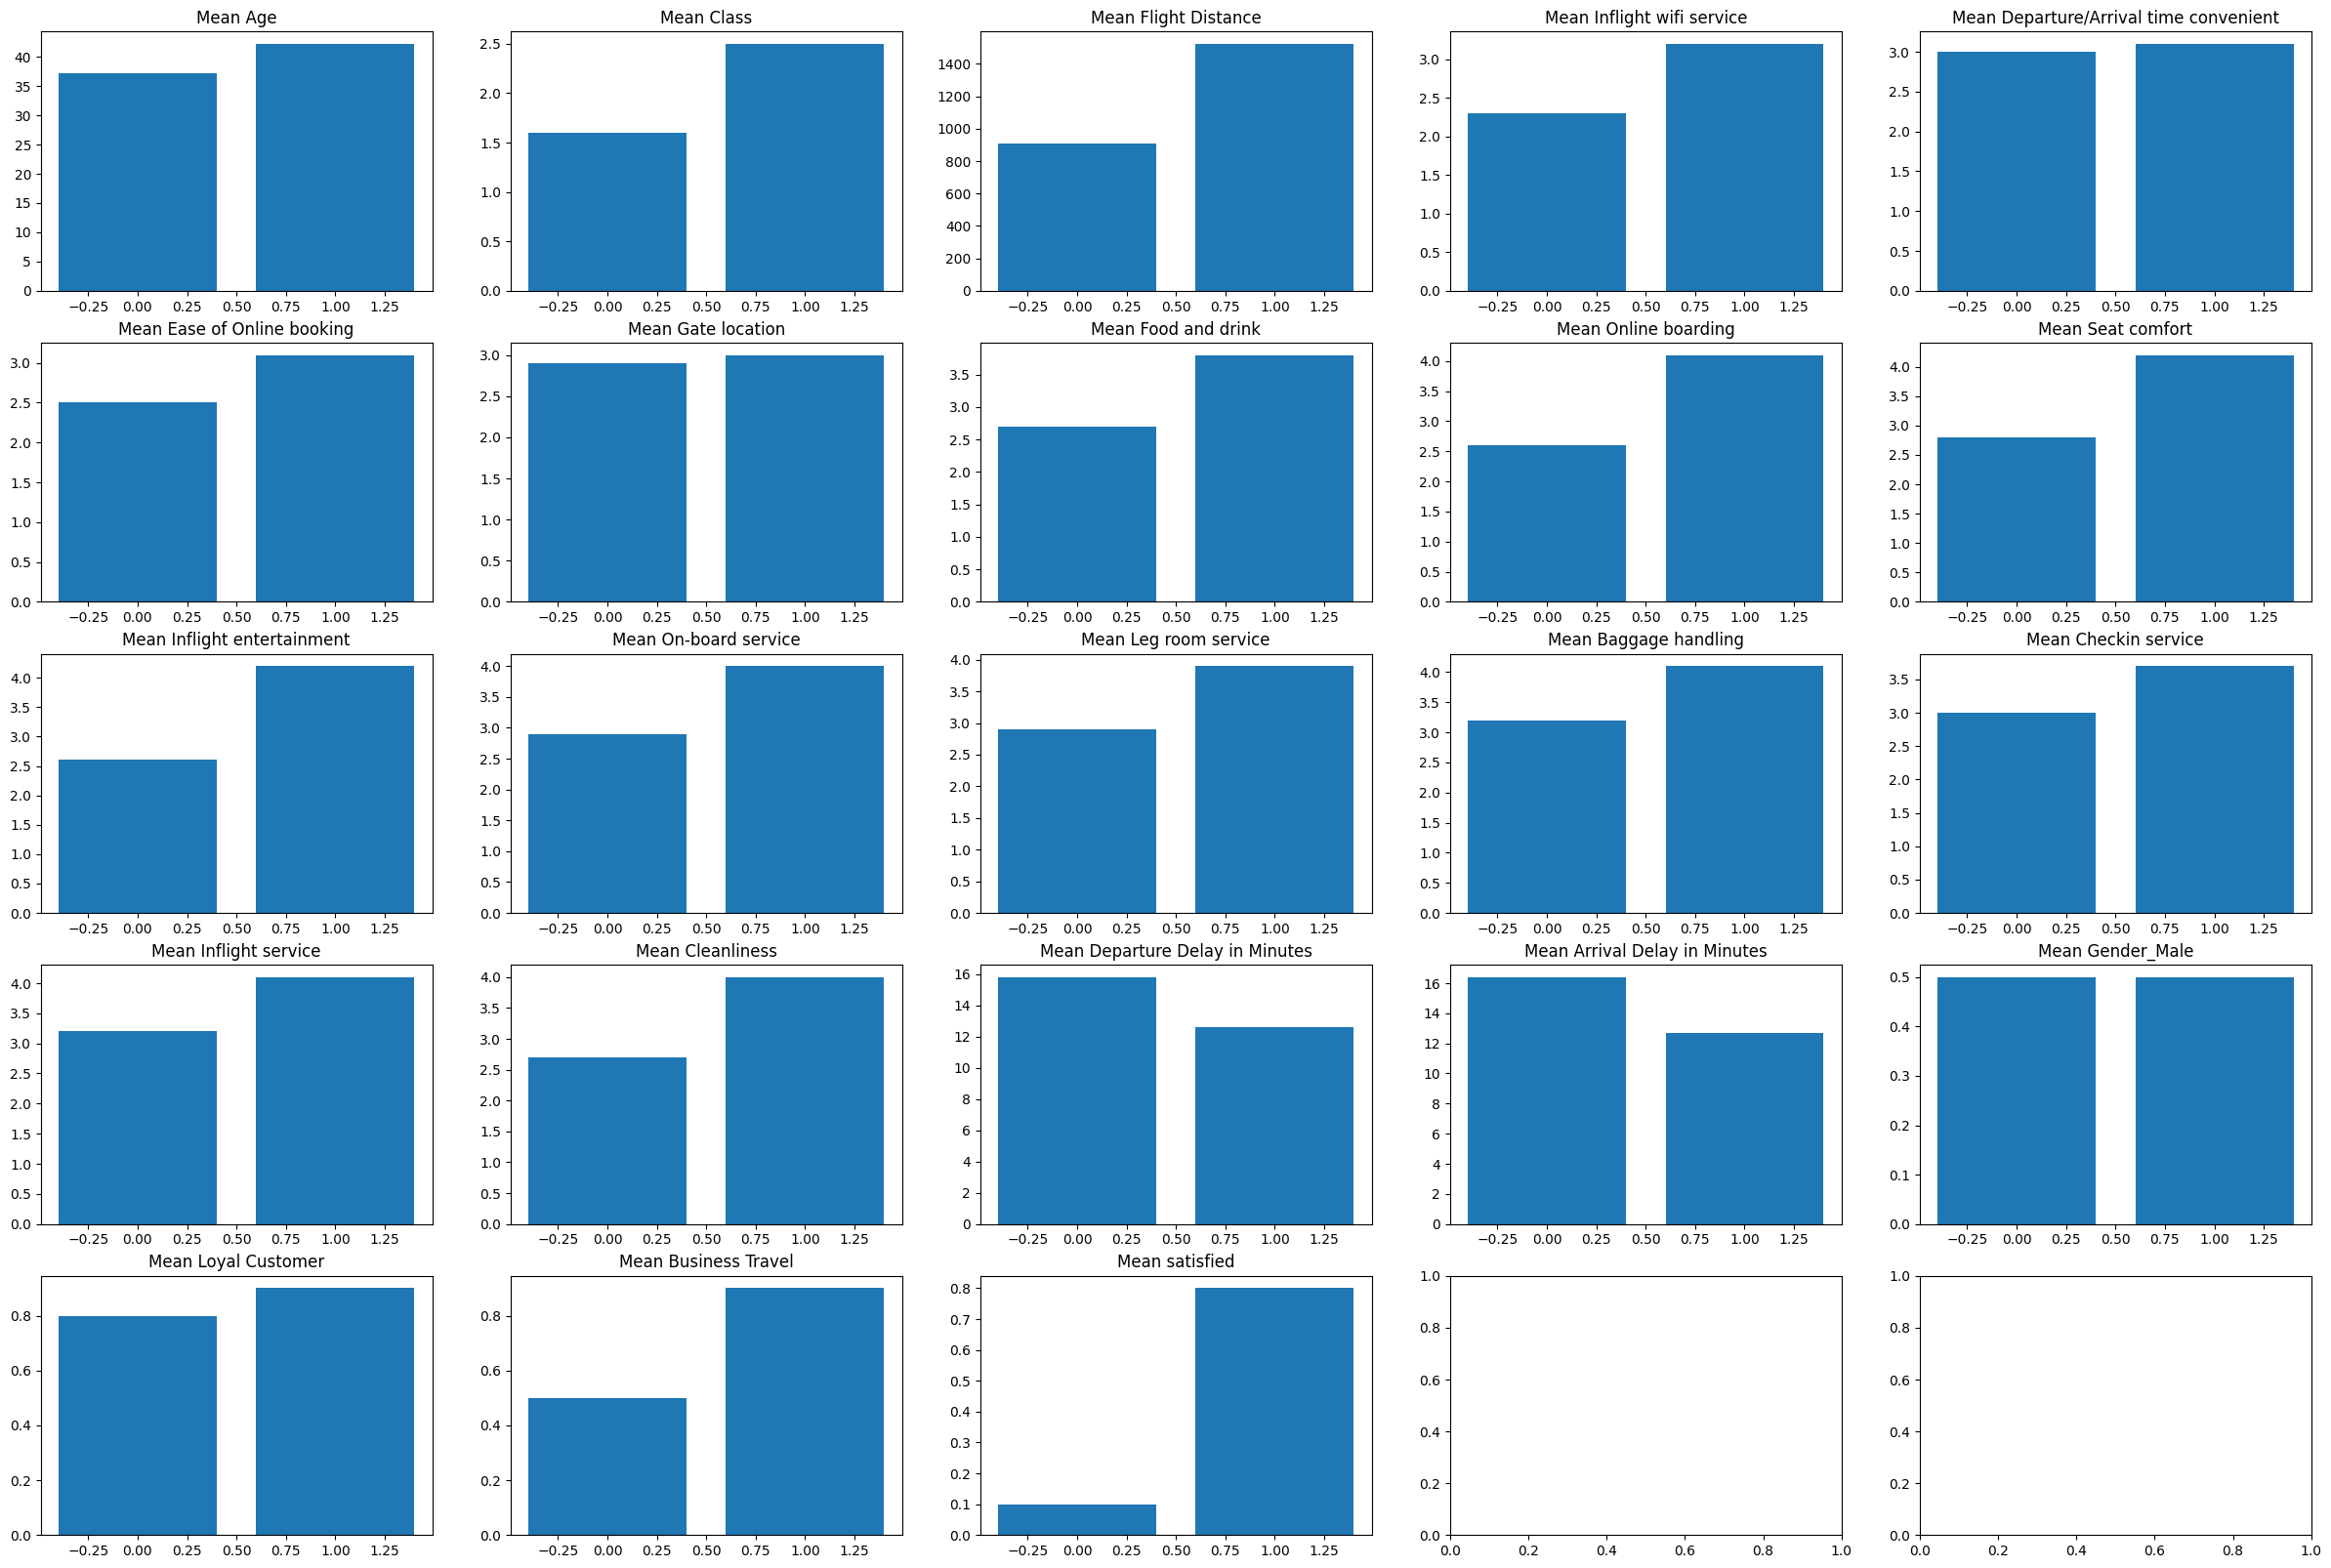

In [14]:
# Visualizar los promedios
fig, axes = plt.subplots(5,5, figsize = (30, 20))
#axes.ravel() will flatten it to 12,1
axes = axes.ravel()
#Itera sobre las columnas y plotea cada una en base a su promedio
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

## Instrucciones de modelado: A la aerolínea también le gustaría saber si la satisfacción general se puede predecir bien a partir de la información de los pasajeros y la satisfacción con partes específicas de su experiencia. Tu objetivo será la columna “satisfied”.

1. Utiliza random_state = 42 para tu train_test_split.

2. Aplica ACP para reducir el número de características a un número más razonable.

  Indica cuántas columnas menos hay después del ACP.
  Indica la cantidad de varianzas retenidas después del ACP.
  
3. No filtres los datos.

4. Utiliza un modelo de aprendizaje profundo para predecir si los clientes informarán que estuvieron satisfechos.

  Crea 3 versiones diferentes de un modelo secuencial.
Cada modelo nuevo debe ser una iteración en el modelo anterior.
 Justifica por escrito por qué cambiaste lo que hiciste para cada modelo.
Por ejemplo, por qué agregaste capas, regularización, nodos, etc.
  Utiliza alguna forma de regularización con al menos un modelo.
  Evalúa cada modelo con las métricas adecuadas.
5. Elije un modelo final y justifica tu decisión.

6. Explica por escrito en qué medida tu modelo resolverá el problema empresarial.

In [15]:
df_2 = df
df_2

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,2,0,0,0,1,1,0,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,18,2,0,1,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,5,3,0,0,1,1,0,0,0
3,54,3,453,3,5,5,5,3,4,4,...,4,3,1,91,80,0,1,1,0,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,4,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10,2,820,5,3,2,2,5,5,4,...,5,5,5,0,0,0,1,1,1,1
19996,27,3,2676,4,3,3,3,4,4,4,...,1,4,4,0,0,0,1,1,0,1
19997,39,1,197,2,5,2,1,4,2,4,...,3,5,4,25,18,1,1,0,0,0
19998,17,3,3340,2,5,5,5,2,2,2,...,2,3,2,2,0,0,1,1,0,0


In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

In [17]:
X = df_2.drop(columns= ["cluster", "satisfied"])
y = df_2["satisfied"]


In [18]:
#escalamos
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df

array([[-0.89202959,  1.00952182,  0.87248186, ..., -0.98147162,
         0.47193019,  0.67357232],
       [ 0.82885333,  1.00952182, -0.50798316, ..., -0.98147162,
         0.47193019,  0.67357232],
       [-0.75965398, -1.06725625, -0.9994367 , ...,  1.01887816,
         0.47193019, -1.48462158],
       ...,
       [-0.03158813, -1.06725625, -0.99044669, ...,  1.01887816,
         0.47193019, -1.48462158],
       [-1.48771983,  1.00952182,  2.1490624 , ..., -0.98147162,
         0.47193019,  0.67357232],
       [ 0.03459967,  1.00952182,  2.33185914, ...,  1.01887816,
         0.47193019,  0.67357232]])

In [19]:
from sklearn.decomposition import PCA

#ACP
#instanciamos y hacemos fit al data usando PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

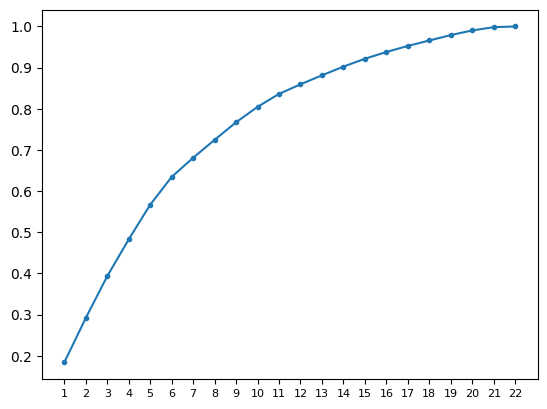

In [20]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 23), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,23), fontsize=8);

Text(0, 0.5, 'Proportion of Explained Variance')

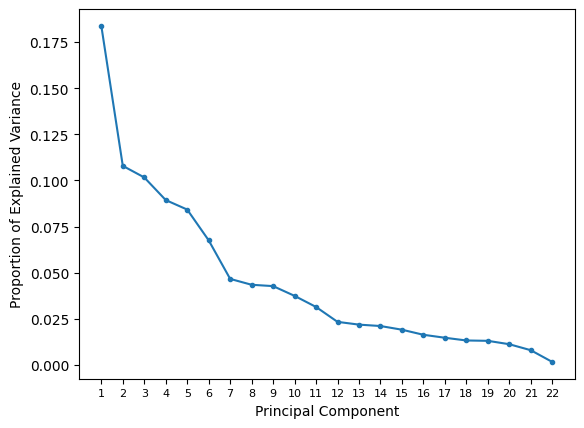

In [21]:
# Plot the explained variance ratios of the first 22 principal components
#Grafico de codo

plt.plot(range(1, 23), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 23), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [22]:
# PCA with 7 components
pca7 = PCA(n_components=7)
X_pca = pca7.fit_transform(scaled_df)
X_pca

array([[ 1.70905359, -0.18981078, -0.47009293, ..., -1.85593746,
        -0.33861085, -0.19437973],
       [-2.25212741, -2.59150469, -0.0385536 , ..., -0.39999633,
        -0.07551113, -0.81808041],
       [ 0.47804899, -1.33619481, -0.95200844, ...,  2.09892689,
        -0.3037428 ,  0.68432549],
       ...,
       [-0.06569161,  0.9502298 , -0.52367318, ...,  2.97711404,
        -0.68294819,  0.68933076],
       [ 1.29705732, -2.19177041, -0.42820468, ..., -2.05977997,
        -0.16560471,  0.80791704],
       [-1.10004757,  0.7822604 , -0.77259487, ..., -1.82044141,
        -0.76722383,  1.25722554]])

In [23]:
#DIVIDIR
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state= 42)

In [24]:
from sklearn.pipeline import make_pipeline
#pipem line con scaler
pipe = make_pipeline(StandardScaler(), PCA(n_components= 7))

In [25]:
#regrecion logistica
#Pon el pipeline ACP en otro pipeline con una regresión logística
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log_pipe = make_pipeline(pipe, log)
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

In [26]:
print('Training accuracy:', log_pipe.score(X_train, y_train))
print('Testing accuracy:', log_pipe.score(X_test, y_test))

Training accuracy: 0.8446666666666667
Testing accuracy: 0.8522


## Deep


In [27]:
input_shape = X_train.shape[1]
input_shape

7

In [28]:
model = Sequential()

In [29]:
# First hidden layer
model.add(Dense(7, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(5, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics=["accuracy"])

In [30]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 2ms/step - loss: 0.5971 - accuracy: 0.7135 - val_loss: 0.5133 - val_accuracy: 0.8364
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4713 - accuracy: 0.8492 - val_loss: 0.4292 - val_accuracy: 0.8620
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3902 - accuracy: 0.8615 - val_loss: 0.3615 - val_accuracy: 0.8646
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3500 - accuracy: 0.8635 - val_loss: 0.3429 - val_accuracy: 0.8706
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3384 - accuracy: 0.8664 - val_loss: 0.3311 - val_accuracy: 0.8736
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3315 - accuracy: 0.8694 - val_loss: 0.3238 - val_accuracy: 0.8734
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3260 - accuracy: 0.8718 - val_loss: 0.3199 - val_accuracy: 0.8740
Epoch 

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

157/157 [==============================] - 0s 946us/step - loss: 0.3044 - accuracy: 0.8788
Loss: 0.3044457733631134, Accuracy: 0.8787999749183655


In [32]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_clases = np.round(y_pred)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_clases)
print(f'Matriz de confusión:\n{cm}')

157/157 [==============================] - 0s 801us/step
Matriz de confusión:
[[2645  212]
 [ 394 1749]]


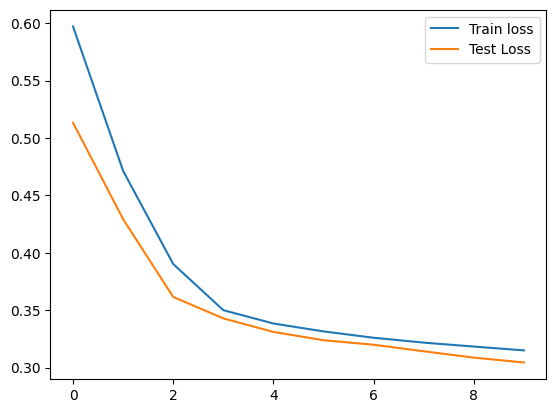

In [33]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

## Metricas

### Pérdida (Loss):
La pérdida es una medida del error entre las predicciones del modelo y los valores reales del conjunto de prueba. Puedes obtener el valor de pérdida utilizando el método evaluate de tu modelo.

In [34]:
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')


157/157 [==============================] - 0s 956us/step - loss: 0.3044 - accuracy: 0.8788
Loss: [0.3044457733631134, 0.8787999749183655]


### Precisión (Accuracy):

 La precisión es una medida de qué tan bien el modelo clasifica correctamente los datos del conjunto de prueba. Es el porcentaje de ejemplos clasificados correctamente sobre el total de ejemplos. También puedes obtener la precisión utilizando el método evaluate.

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


157/157 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8788
Accuracy: 0.8787999749183655


## Otras métricas:

Dependiendo del problema que estés abordando, puedes utilizar otras métricas específicas. Por ejemplo, para problemas de clasificación binaria, puedes utilizar la precisión, la recuperación (recall), la puntuación F1, la matriz de confusión, etc. Para problemas de regresión, puedes utilizar el error cuadrático medio (MSE), el coeficiente de determinación (R2), etc.
Puedes utilizar bibliotecas como scikit-learn para calcular y visualizar estas métricas. Aquí tienes un ejemplo de cómo calcular la matriz de confusión para un problema de clasificación binaria:

In [36]:
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)
print(f'Matriz de confusión:\n{cm}')

157/157 [==============================] - 0s 884us/step
Matriz de confusión:
[[2857    0]
 [2143    0]]
